In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"]=(4,4)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
import sys
sys.path.insert(0,"../helper_functions")

In [2]:
adata=sc.read_h5ad("../../../harmony_integrated_for_collab.h5ad")

In [3]:
adata_all = sc.read_h5ad("../../../datasets/integrated_object_only_published_harmony.h5ad")

In [5]:
adata_sub = adata[adata.obs["clusters"].isin(["LC1","LC2"])]
adata_sub.obs["celltype_dataset"] = adata_sub.obs["clusters"].astype(str)+adata_sub.obs["Study"].astype(str)

/Users/snyquist/opt/anaconda3/envs/pertpy/lib/python3.11/site-packages/pandas/core/arrays/categorical.py:595: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)
/Users/snyquist/opt/anaconda3/envs/pertpy/lib/python3.11/site-packages/pandas/core/arrays/categorical.py:595: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)
/var/folders/2w/wzpnv4x92_lbnlcccg_sb4t40000gq/T/ipykernel_96805/3153997501.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sub.obs["celltype_dataset"] = adata_sub.obs["clusters"].astype(str)+adata_sub.obs["Study"].astype(str)


In [6]:
#LC1_up = ["FUT2", "FUT3", "FUT6", "ST3GAL1", "GCNT1","GCNT2", "B3GNT2", "B3GNT7", 
#          "B3GNT3", "B3GALT4", "B3GALT6", "B3GALNT2"]
#LC2_up = ["ST6GAL1", "B3GALT5", "B4GALT1" ]

Futs = ["FUT1","FUT2","FUT3","FUT4","FUT5","FUT6","FUT7","FUT8","FUT9","FUT10","FUT11"]
st32 = ["ST3GAL1","ST3GAL2","ST3GAL3","ST3GAL4","ST3GAL5","ST3GAL6"]
st6gal = ["ST6GAL1","ST6GAL2"]
gcnt = ["GCNT1","GCNT2","GCNT3","GCNT4"]
b3gnt = ["B3GNT2","B3GNT3","B3GNT4","B3GNT5","B3GNT6","B3GNT7","B3GNT8","B3GNT9"]
b3galt = ["B3GALT1","B3GALT2","B3GALT4","B3GALT5","B3GALT6"]
b4galt = ["B4GALT1","B4GALT2","B4GALT3","B4GALT4","B4GALT5","B4GALT6","B4GALT7","B4GALT8","B4GALT9"]
st6galnac = ["ST6GALNAC1","ST6GALNAC2","ST6GALNAC3","ST6GALNAC4","ST6GALNAC5","ST6GALNAC6"]
b3gat = ["B3GAT1","B3GAT2","B3GAT3","B2GLCT"]
b3galnt = ["B3GALNT1","B3GALNT2"]
b4galnt = ["B4GALNT1","B4GALNT2","B4GALNT3","B4GALNT4"]
genelists = [Futs,st32,st6gal,gcnt,b3gnt,b3galt,b4galt,st6galnac,b3gat,b4galnt,b3galnt]
genes = []
for g in genelists:
    genes= genes+[i for i in g if i in adata_sub.raw.var_names]

deseq2_res = pd.read_csv("/Users/snyquist/Dropbox (Gladstone)/BM_Integration/HMO_longitudinal/DESeq_HMO/LC1_LC2_cross_study_DE_wald.csv",index_col=0)
sc.tl.rank_genes_groups(adata_sub, groupby="celltype_dataset",pts=True)
min_10pct_exp=adata_sub.uns["rank_genes_groups"]["pts"].loc[genes][(adata_sub.uns["rank_genes_groups"]["pts"].loc[genes]>=.1).any(axis=1)].index#[adata_sub.uns["rank_genes_groups"]["pts"].loc[genes,"LC1Martin-Carli2020"] >=.10]
sig_hmo_genes = deseq2_res.loc[genes][deseq2_res.loc[genes,"padj"]<0.05].index
sig_hmo_genes_10pct = deseq2_res.loc[min_10pct_exp][deseq2_res.loc[min_10pct_exp,"padj"]<0.05].index
lc2_up_10pct= deseq2_res.loc[sig_hmo_genes_10pct][deseq2_res.loc[sig_hmo_genes_10pct]["log2FoldChange"]>0].sort_values("log2FoldChange",ascending=False).index
lc1_up_10pct= deseq2_res.loc[sig_hmo_genes_10pct][deseq2_res.loc[sig_hmo_genes_10pct]["log2FoldChange"]<0].sort_values("log2FoldChange",ascending=False).index
other = set(min_10pct_exp)-set(sig_hmo_genes_10pct)

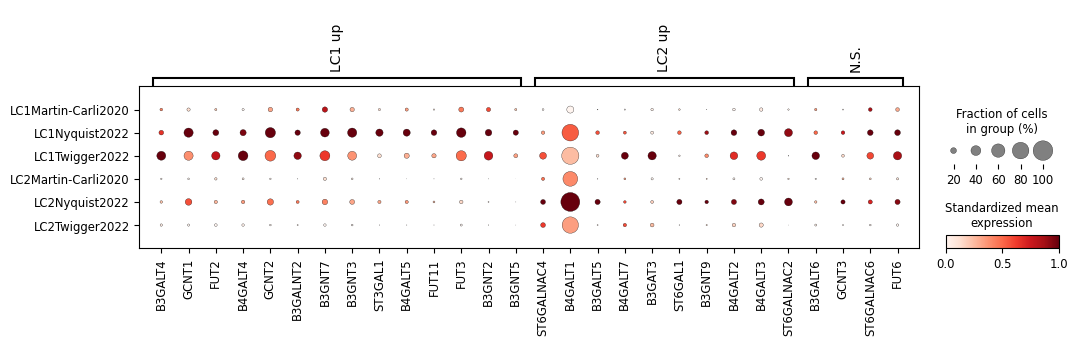

In [10]:
de_gene_groups = {"LC1 up":lc1_up_10pct,"LC2 up":lc2_up_10pct,"N.S.":list(other)}
sc.pl.dotplot(adata_sub,de_gene_groups,groupby="celltype_dataset",standard_scale="var",colorbar_title="Standardized mean\nexpression",show=False)
plt.savefig("../Figures/Figure2 - HMO gene DEs/Fig1A_by_sample.pdf")

/Users/snyquist/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/Users/snyquist/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/Users/snyquist/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be i

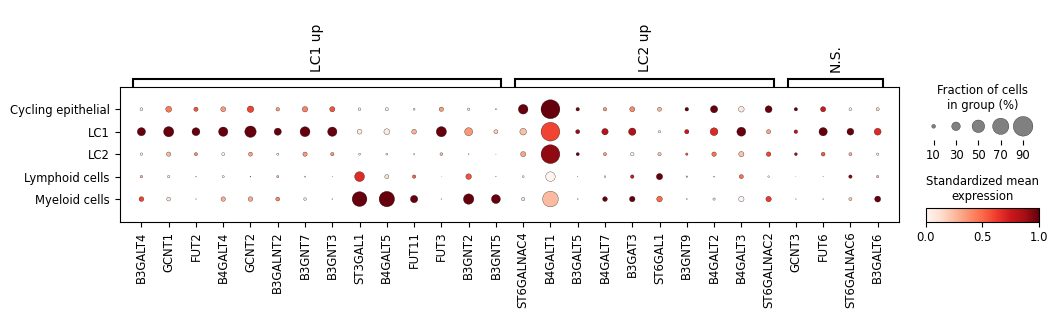

In [8]:
de_gene_groups = {"LC1 up":lc1_up_10pct,"LC2 up":lc2_up_10pct,"N.S.":list(other)}
sc.pl.dotplot(adata_all,de_gene_groups,groupby="simple clusters",standard_scale="var",colorbar_title="Standardized mean\nexpression",show=False)
plt.savefig("../Figures/Figure2 - HMO gene DEs/Fig1A_incl_immune.pdf")

In [53]:
adata_withtissue = sc.read_h5ad("../../../datasets/tissue_and_harmony_integrated.h5ad")


/Users/snyquist/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/Users/snyquist/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/Users/snyquist/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be i

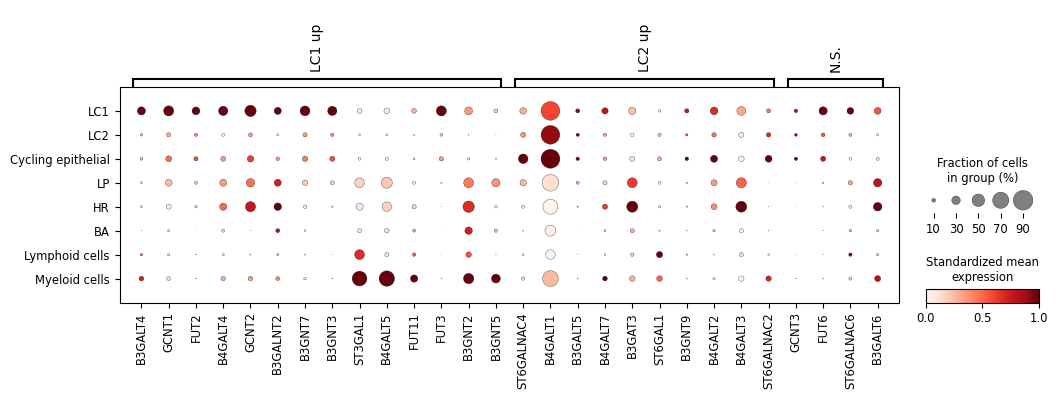

In [56]:
de_gene_groups = {"LC1 up":lc1_up_10pct,"LC2 up":lc2_up_10pct,"N.S.":list(other)}
sc.pl.dotplot(adata_withtissue,de_gene_groups,groupby="combined clusters",show=False,standard_scale="var",colorbar_title="Standardized mean\nexpression",
             categories_order=["LC1","LC2","Cycling epithelial","LP","HR","BA","Lymphoid cells","Myeloid cells"])
plt.savefig("../Figures/FigureS1 - HMO gene DE/FigS1C_degenes_with_tissue.pdf")

In [8]:
# log fold changes in expression

adata_sub.obs["Sample"]=adata_sub.obs["biosample_id"].astype(str)
adata_sub.obs.loc[adata_sub.obs["Study"].isin(["Twigger2022","Martin-Carli2020"]),"Sample"] = adata_sub.obs.loc[adata_sub.obs["Study"].isin(["Twigger2022","Martin-Carli2020"]),'Donor']

# get list of genes
genes = []
for g in genelists:
    genes= genes+[i for i in g if i in adata_sub.raw.var_names]
    
exp = pd.DataFrame(adata_sub.raw[:,genes].X.todense(), index=adata_sub.obs_names, columns = genes)
# add metadata onto expression
exp["Sample"] = adata_sub.obs["Sample"]
exp["cluster"] = adata_sub.obs["clusters"]

meanexp =exp.groupby(["Sample","cluster"]).mean()

lfcs = pd.DataFrame(index=exp["Sample"].unique(),columns=genes)
for s in exp["Sample"].unique():
    df = meanexp.loc[s]
    lfcs.loc[s]=np.log2(df.loc["LC1"]/df.loc["LC2"])
    
lfcs=lfcs.replace(np.inf,np.nan)
lfcs=lfcs.replace(-1*np.inf,np.nan)


sample_study_mapping = {}
#for i in nyquist.obs["biosample_id"].unique():
#    sample_study_mapping[i]="Nyquist2022"
#for i in twigger.obs["Donor"].unique():
#    sample_study_mapping[i] = "Twigger2022"
#for i in martincarli.obs["Donor"].unique():
#    sample_study_mapping[i] = "Martin-Carli2020"
for i in lfcs.index:
    sample_study_mapping[i] = adata_sub.obs.loc[adata_sub.obs["Sample"]==i,"Study"][0]
lfcs["Study"] =lfcs.index.map(sample_study_mapping)

lfcs_2 = lfcs.drop("Study",axis=1).stack().reset_index()
lfcs_2.columns = ["Sample","Gene","LFC"]
lfcs_2["Study"] = lfcs_2["Sample"].map(sample_study_mapping)

/Users/snyquist/opt/anaconda3/envs/pertpy/lib/python3.11/site-packages/pandas/core/arrays/categorical.py:595: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)
/var/folders/2w/wzpnv4x92_lbnlcccg_sb4t40000gq/T/ipykernel_96805/4149505967.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  meanexp =exp.groupby(["Sample","cluster"]).mean()
/Users/snyquist/opt/anaconda3/envs/pertpy/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/2w/wzpnv4x92_lbnlcccg_sb4t40000gq/T/ipykernel_96805/4149505967.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavio

In [9]:
# make table of mean expression per celltype per sample
exp_LC1 = pd.DataFrame(adata_sub[adata_sub.obs["clusters"]=="LC1"].raw[:,genes].X.todense(), index=adata_sub[adata_sub.obs["clusters"]=="LC1"].obs_names, columns = genes)
exp_LC2 = pd.DataFrame(adata_sub[adata_sub.obs["clusters"]=="LC2"].raw[:,genes].X.todense(), index=adata_sub[adata_sub.obs["clusters"]=="LC2"].obs_names, columns = genes)
exp_LC1["Sample"] = adata_sub[adata_sub.obs["clusters"]=="LC1"].obs["Sample"]
exp_LC1["Study"] = adata_sub[adata_sub.obs["clusters"]=="LC1"].obs["Study"]
exp_LC2["Sample"] = adata_sub[adata_sub.obs["clusters"]=="LC2"].obs["Sample"]
exp_LC2["Study"] = adata_sub[adata_sub.obs["clusters"]=="LC2"].obs["Study"]

expmean_LC1 = exp_LC1.groupby(["Study","Sample"]).mean()
expmean_LC2 = exp_LC2.groupby(["Study","Sample"]).mean()

/var/folders/2w/wzpnv4x92_lbnlcccg_sb4t40000gq/T/ipykernel_96805/279074133.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  expmean_LC1 = exp_LC1.groupby(["Study","Sample"]).mean()
/var/folders/2w/wzpnv4x92_lbnlcccg_sb4t40000gq/T/ipykernel_96805/279074133.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  expmean_LC2 = exp_LC2.groupby(["Study","Sample"]).mean()


In [11]:
tableS1 = pd.DataFrame(index=genes)
for s in adata_sub.obs["Study"].unique():
    exp_LC1 = pd.DataFrame(adata_sub[(adata_sub.obs["clusters"]=="LC1")& (adata_sub.obs["Study"]==s)].raw[:,genes].X.todense(), index=adata_sub[(adata_sub.obs["clusters"]=="LC1")& (adata_sub.obs["Study"]==s)].obs_names, columns = genes)
    exp_LC2 = pd.DataFrame(adata_sub[(adata_sub.obs["clusters"]=="LC2")& (adata_sub.obs["Study"]==s)].raw[:,genes].X.todense(), index=adata_sub[(adata_sub.obs["clusters"]=="LC2")& (adata_sub.obs["Study"]==s)].obs_names, columns = genes)
    exp_LC1["Sample"] = adata_sub[(adata_sub.obs["clusters"]=="LC1")& (adata_sub.obs["Study"]==s)].obs["Sample"]
    exp_LC2["Sample"] = adata_sub[(adata_sub.obs["clusters"]=="LC2")& (adata_sub.obs["Study"]==s)].obs["Sample"]
    expmean_LC1 = exp_LC1.groupby(["Sample"]).mean()
    expmean_LC2 = exp_LC2.groupby(["Sample"]).mean()
    tableS1[s + " LC1 mean exp"] = expmean_LC1.mean().T
    tableS1[s + " LC2 mean exp"] = expmean_LC2.mean().T
    tableS1[s + " LC1 exp std dev"] = expmean_LC1.std().T
    tableS1[s + " LC2 exp std dev"] = expmean_LC2.std().T
    tableS1[s + " LC1/LC2 mean log2foldchange"]=lfcs_2.loc[lfcs_2["Study"] == s].groupby("Gene")["LFC"].mean()

In [156]:
tableS1.to_csv("../Supplemental Tables/TableS1 - mean expression per sample HMO genes.csv")

/Users/snyquist/opt/anaconda3/envs/pertpy/lib/python3.11/site-packages/pandas/core/indexes/base.py:7834: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


In [12]:
def lfc_barplot(lfcs_2,genesplot):
    #ax=sns.barplot(data=lfcs_2[lfcs_2["Gene"].isin(genesplot)],y="LFC",x="Gene",hue="Study")
    ax=sns.stripplot(data=lfcs_2[lfcs_2["Gene"].isin(genesplot)],y="LFC",x="Gene",hue="Study",dodge=True,jitter=True,linewidth=.4,edgecolor='gray',alpha=.8,size=3,order=genesplot)
    sns.pointplot(data=lfcs_2[lfcs_2["Gene"].isin(genesplot)],y="LFC",x="Gene",hue="Study",join=False,dodge=.8 - .8 / 4,order=genesplot )
    handles, labels = ax.get_legend_handles_labels()
    plt.xticks(rotation=90)
    plt.legend(handles[0:3], labels[0:3],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/var/folders/2w/wzpnv4x92_lbnlcccg_sb4t40000gq/T/ipykernel_7745/2080353497.py:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax=sns.stripplot(data=lfcs_2[lfcs_2["Gene"].isin(genesplot)],y="LFC",x="Gene",hue="Study",dodge=True,jitter=True,linewidth=.4,edgecolor='gray',alpha=.8,size=3,order=genesplot)
/var/folders/2w/wzpnv4x92_lbnlcccg_sb4t40000gq/T/ipykernel_7745/2080353497.py:4: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=lfcs_2[lfcs_2["Gene"].isin(genesplot)],y="LFC",x="Gene",hue="Study",join=False,dodge=.8 - .8 / 4,order=genesplot )


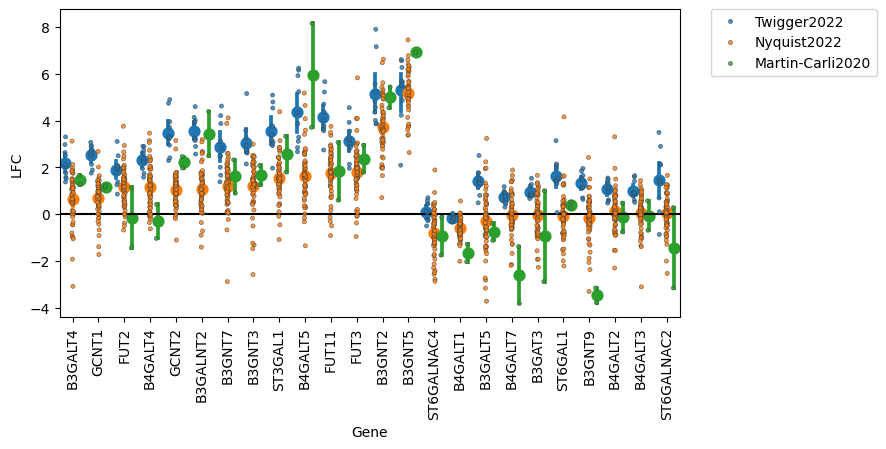

In [15]:
plt.rcParams["figure.figsize"]=(8,4)
lfc_barplot(lfcs_2,list(lc1_up_10pct)+list(lc2_up_10pct))
plt.axhline(y=0, color='k', linestyle='-')
plt.savefig("../Figures/Figure2 - HMO gene DEs/Fig1B_LFCs.pdf")

In [13]:
# add in time postpartum
tpp_map = {}
for i in adata_sub.obs["biosample_id"].unique():
    if type(i) != float :
        tpp_map[i] = adata_sub.obs.loc[adata_sub.obs["biosample_id"]==i,"time_post_partum_weeks"][0]
        
tpp_map['BT_t3_lot1']=46.29
tpp_map['BT_t3_old'] = 46.29
tpp_map['K1'] =84.57
tpp_map["K2"] = 84.57
tpp_map["B2"] = 27.29
tpp_map["BM5"] = 27.29
tpp_map['BM05_26wk_r1'] =33
tpp_map['Bfresh'] = 33
tpp_map["Kfresh"] = 632
lfcs_2.index = lfcs_2["Sample"]
lfcs_time = lfcs_2.loc[lfcs_2["Study"]=="Nyquist2022"]
lfcs_time["time"] = lfcs_time.index.map(tpp_map)

/var/folders/2w/wzpnv4x92_lbnlcccg_sb4t40000gq/T/ipykernel_96805/334532599.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tpp_map[i] = adata_sub.obs.loc[adata_sub.obs["biosample_id"]==i,"time_post_partum_weeks"][0]
/var/folders/2w/wzpnv4x92_lbnlcccg_sb4t40000gq/T/ipykernel_96805/334532599.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lfcs_time["time"] = lfcs_time.index.map(tpp_map)


In [14]:
import scipy.stats
import statsmodels.stats.multitest
pvals = pd.DataFrame(index=lfcs_time["Gene"].unique(),columns = ["r","p","padj"])
for g in lfcs_time["Gene"].unique():
    lfc_sub = lfcs_time.loc[(lfcs_time["Gene"]==g)&(lfcs_time["LFC"].notna())&(lfcs_time["time"]<200)]
    if lfc_sub.shape[0] >2:
        #print(g)
        p=scipy.stats.pearsonr(lfc_sub["LFC"],lfc_sub["time"])
        pvals.loc[g,"r"] = p[0]
        pvals.loc[g,"p"] = p[1]
pvals = pvals.loc[pvals["r"].notna()]
pvals["padj"]=statsmodels.stats.multitest.multipletests(pvals["p"], alpha=0.05, method='fdr_bh')[1]

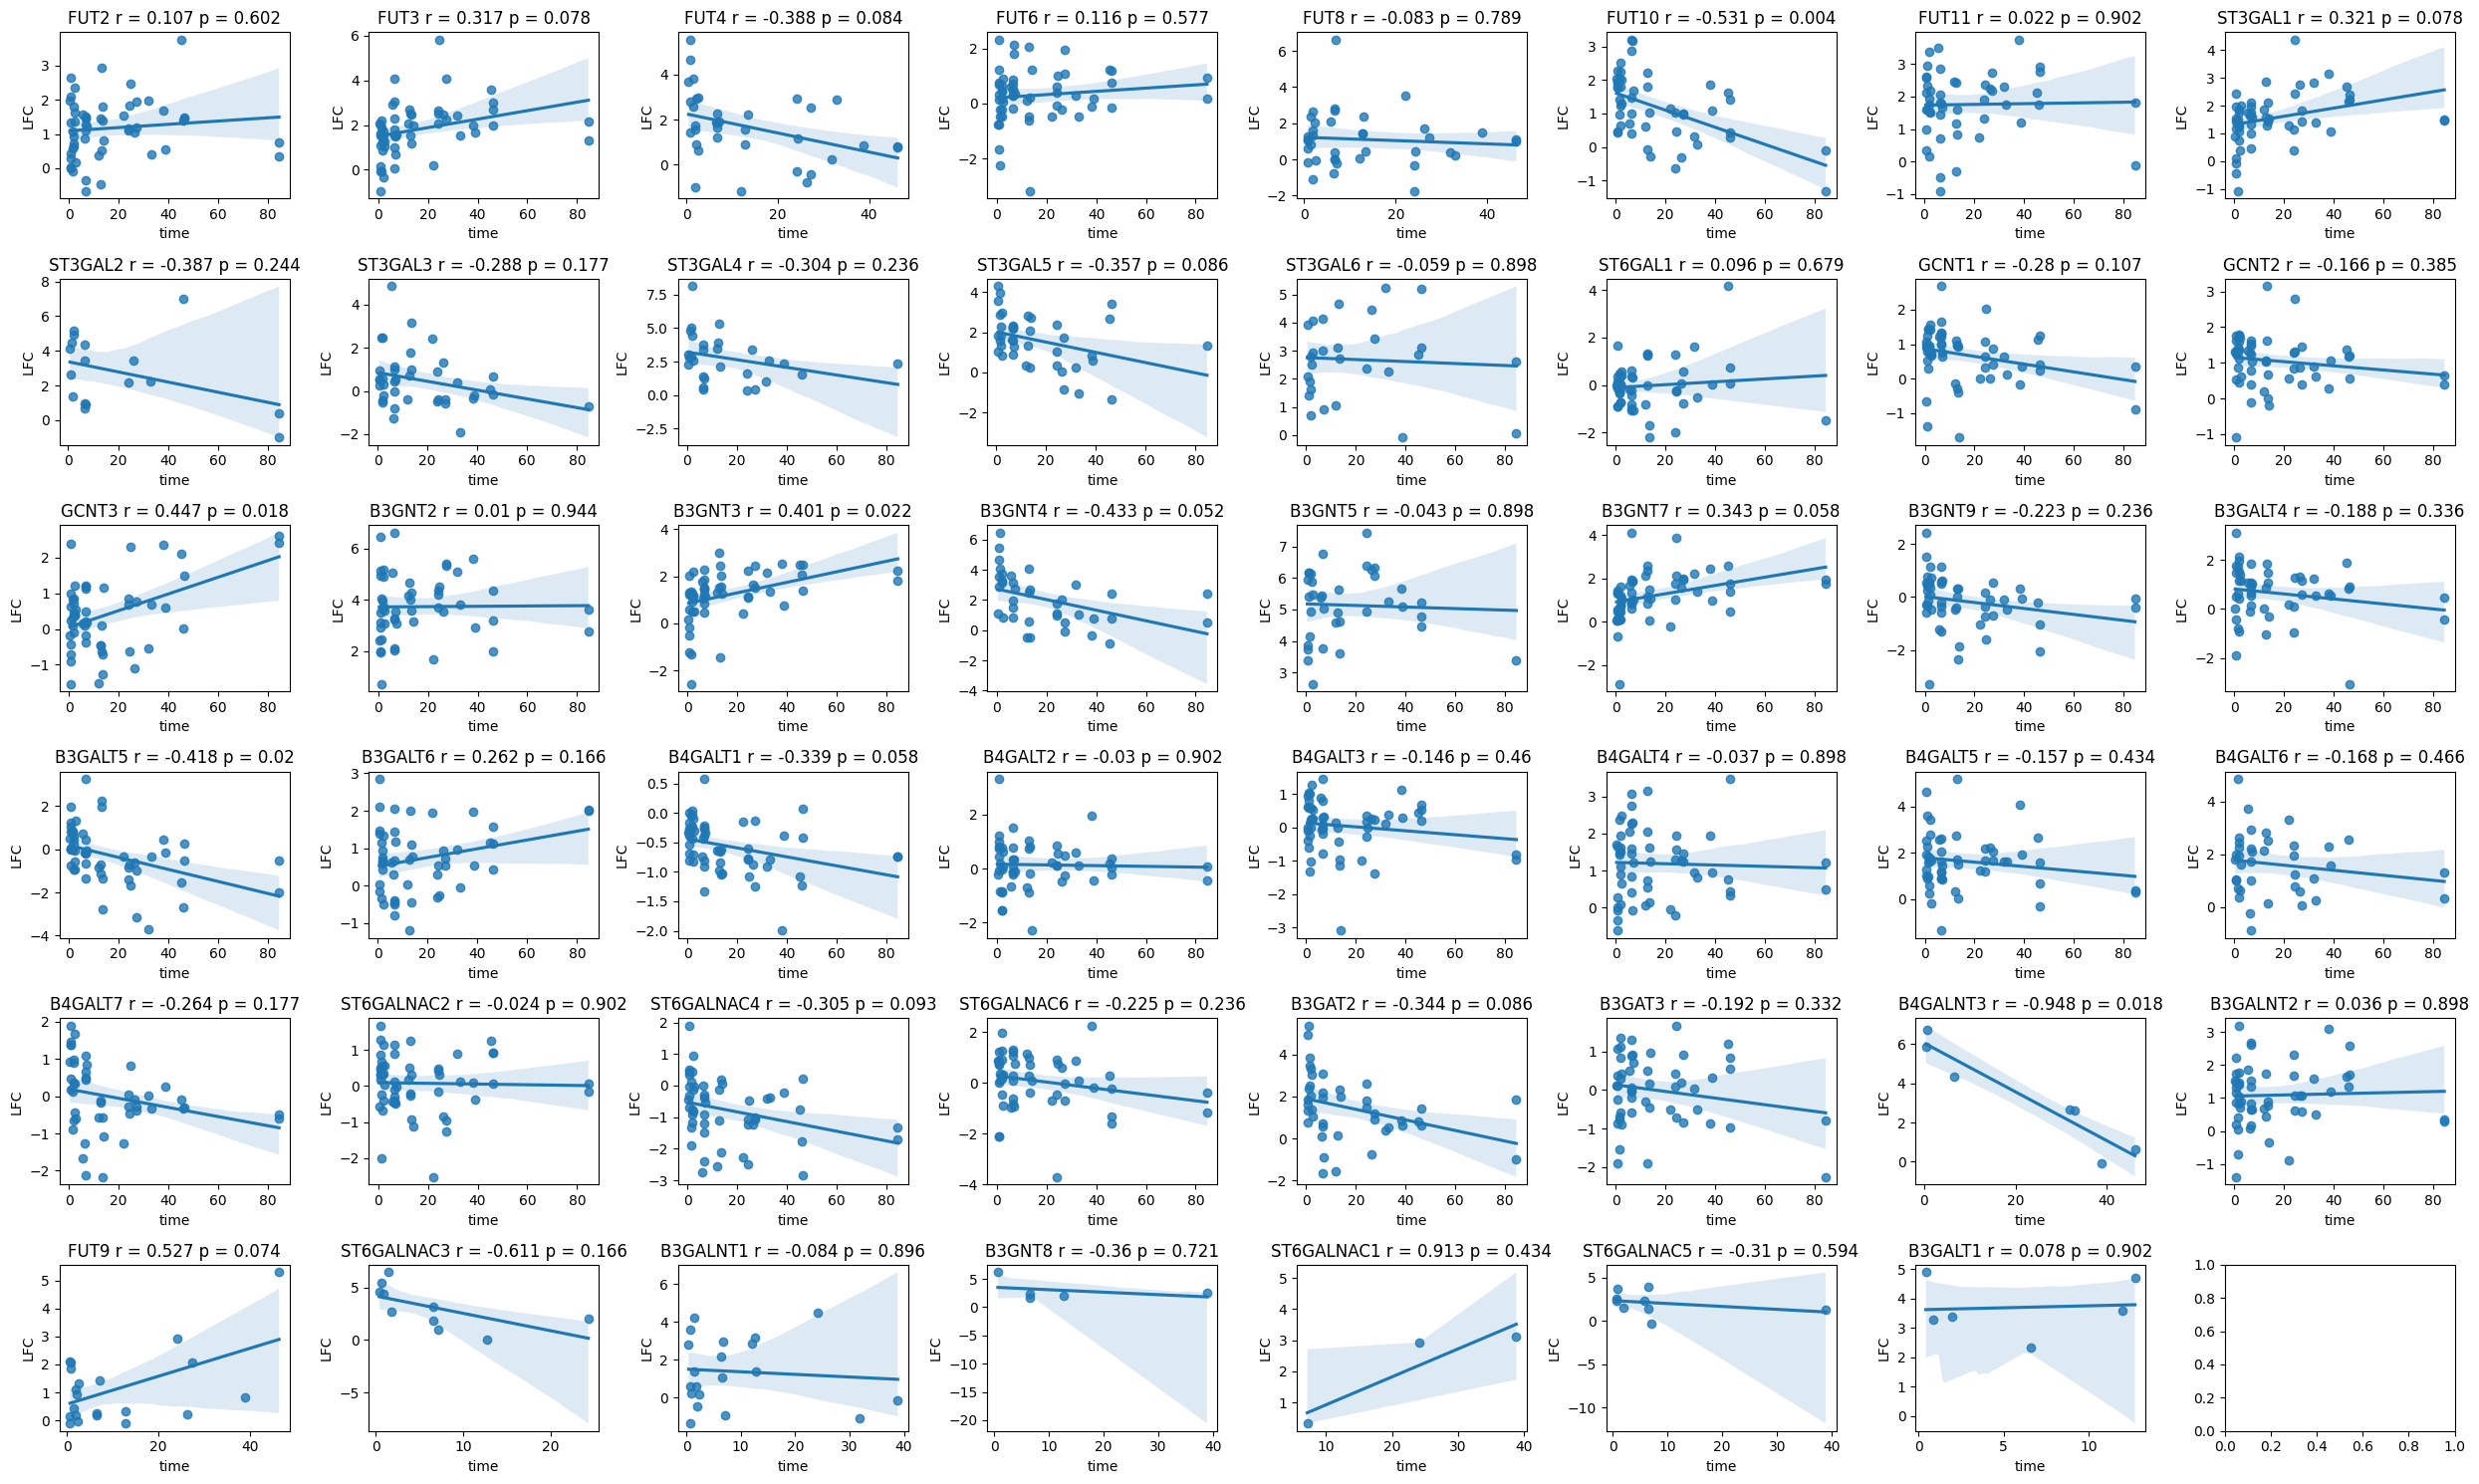

In [20]:
fig,ax1 = plt.subplots(6,8,figsize=(25,15))
ax = ax1.ravel()
ind = 0
for g in pvals.index:
    lfc_sub = lfcs_time.loc[(lfcs_time["Gene"]==g)&(lfcs_time["LFC"].notna())&(lfcs_time["time"]<200)]
    if lfc_sub.shape[0] >2:
        #print(g)
        sns.regplot(data=lfc_sub,x="time",y="LFC",ax=ax[ind],)
        ax[ind].set_title(g+" r = "+str(round(pvals.loc[g,"r"],3))+" p = "+str(round(pvals.loc[g,"padj"],3)))
        ind += 1
plt.tight_layout()
plt.savefig("../Figures/FigureS1 - HMO gene DE/FigS1D_LFCs_over_time.pdf")

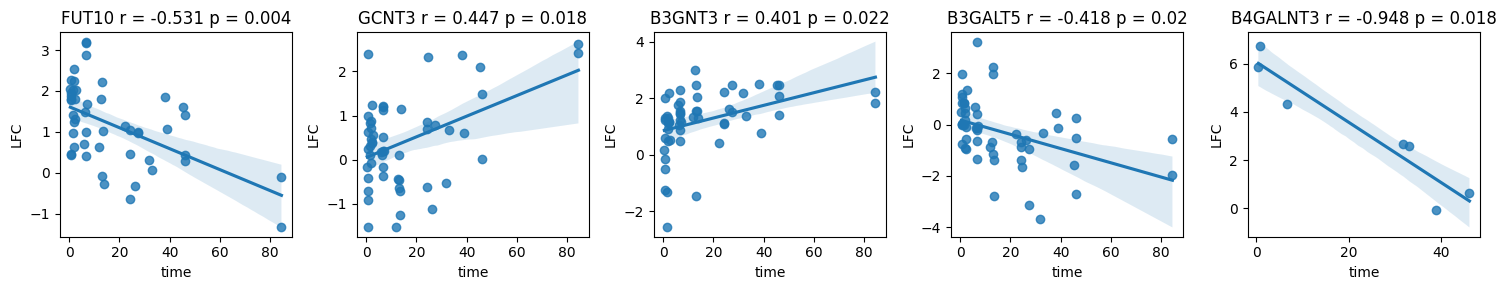

In [15]:
pvals[pvals["padj"]<0.05]
fig,ax1 = plt.subplots(1,5,figsize=(15,3))
ax = ax1.ravel()
ind = 0
for g in pvals[pvals["padj"]<0.05].index:
    lfc_sub = lfcs_time.loc[(lfcs_time["Gene"]==g)&(lfcs_time["LFC"].notna())&(lfcs_time["time"]<200)]
    if lfc_sub.shape[0] >2:
        #print(g)
        sns.regplot(data=lfc_sub,x="time",y="LFC",ax=ax[ind],)
        ax[ind].set_title(g+" r = "+str(round(pvals.loc[g,"r"],3))+" p = "+str(round(pvals.loc[g,"padj"],3)))
        ind += 1
plt.tight_layout()
plt.savefig("../Figures/Figure2 - HMO gene DEs/Figure1C_LFCs_over_time_sig.pdf")

# Plot of time varying genes!

In [20]:
adata_LC1_nyquist = adata[(adata.obs["Study"]=="Nyquist2022")&(adata.obs['clusters']=="LC1")]
adata_LC2_nyquist = adata[(adata.obs["Study"]=="Nyquist2022")&(adata.obs['clusters']=='LC2')]


In [21]:
times_pp = pd.DataFrame.from_dict(tpp_map,orient="index")
times_pp = times_pp[times_pp[0] <=60]
ordered_by_tpp = times_pp.sort_values(0).index

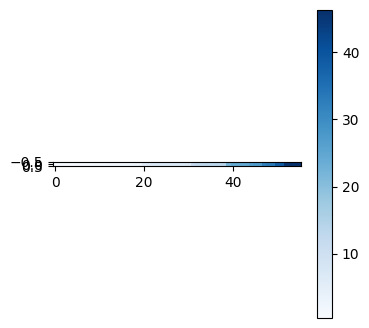

In [25]:
LC2_time_genes = pd.read_csv("/Users/snyquist/Dropbox (Gladstone)/Breast Milk Study/zz_Analysis/Sarah/time_series_analysis/time_varying_genes_2021/episub_Sec_Lactocytes_time_dependent_genes.csv",index_col=0)
LC2_time_genes_sig = LC2_time_genes[LC2_time_genes["padj"]<0.05]
LC2_HMO_time_genes = set() 
for g in genelists:
    g_sub = list(set(g).intersection(LC2_time_genes_sig.index))
    LC2_HMO_time_genes= LC2_HMO_time_genes.union(g_sub)
LC2_HMO_time_genes = LC2_time_genes_sig.loc[list(LC2_HMO_time_genes)].sort_values("log2FoldChange").index
ordered_by_tpp_tmp = [i for i in ordered_by_tpp if i in adata_LC2_nyquist.obs["biosample_id"].unique()]
sc.pl.matrixplot(adata_LC2_nyquist[adata_LC2_nyquist.obs["biosample_id"].isin(ordered_by_tpp_tmp)],var_names = list(LC2_HMO_time_genes),groupby="biosample_id",cmap="coolwarm",swap_axes=True,standard_scale="var",categories_order=ordered_by_tpp_tmp,use_raw=True,show=False)
plt.savefig("../Figures/Figure2 - HMO gene DEs/Figure2D_LC2_genes_with_time.pdf")
plt.imshow(times_pp.loc[ordered_by_tpp_tmp].sort_values(0).values.T,cmap="Blues")
plt.colorbar()
plt.savefig("../Figures/Figure2 - HMO gene DEs/Figure2D_LC2_genes_with_time_weekspp_colorbar.pdf")

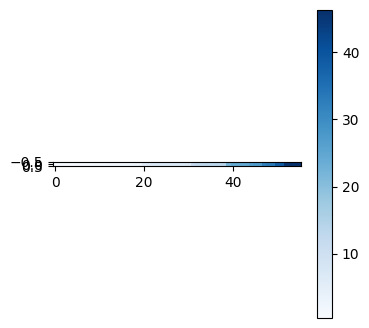

In [24]:
LC1_time_genes = pd.read_csv("/Users/snyquist/Dropbox (Gladstone)/Breast Milk Study/zz_Analysis/Sarah/time_series_analysis/time_varying_genes_2021/episub_Luminal_Epithelial_time_dependent_genes.csv",index_col=0)
LC1_time_genes_sig = LC1_time_genes[LC1_time_genes["padj"]<0.05]
LC1_HMO_time_genes = set() 
for g in genelists:
    g_sub = list(set(g).intersection(LC1_time_genes_sig.index))
    LC1_HMO_time_genes = LC1_HMO_time_genes.union(g_sub)
LC1_HMO_time_genes = LC1_time_genes_sig.loc[list(LC1_HMO_time_genes)].sort_values("log2FoldChange").index
sc.pl.matrixplot(adata_LC1_nyquist[adata_LC1_nyquist.obs["biosample_id"].isin(ordered_by_tpp)],var_names = list(LC1_HMO_time_genes),groupby="biosample_id",cmap="coolwarm",swap_axes=True,standard_scale="var",categories_order=list(ordered_by_tpp),use_raw=True,show=False)
plt.savefig("../Figures/Figure2 - HMO gene DEs/Figure2D_LC1_genes_with_time.pdf")
plt.imshow(times_pp.sort_values(0).values.T,cmap="Blues")
plt.colorbar()
plt.savefig("../Figures/Figure2 - HMO gene DEs/Figure2D_LC1_genes_with_time_weekspp_colorbar.pdf")